## Data generating(brownian motion)

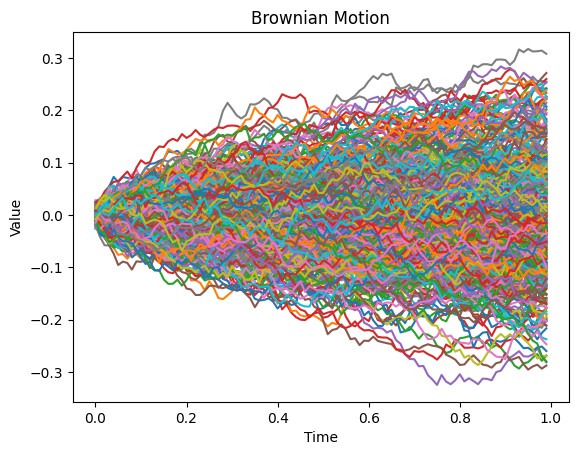

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def standard_brownian_motion() :
  increment = np.random.normal(0, 0.01, 100)
  bm = np.cumsum(increment)
  return bm

def data_generate(n = 500) :
  np.random.seed(0)
  data = np.zeros((n,100))
  for i in range(n) :
    data[i,] = standard_brownian_motion()
  return data
n = 500
X = data_generate()

grid = np.linspace(0,0.99,100)

for i in range(X.shape[0]):
    plt.plot(grid, X[i,])

plt.title('Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


## Simulation setting

In [ ]:
import scipy
# Define inner product
def inner_product(x,y,grid = np.linspace(0,0.99,100)) :
  len = grid[1] - grid[0]
  approx = scipy.integrate.simpson(x*y,dx = len)
  return approx
inner_product(x=grid,y=grid**5,grid=grid) # x = x, y = x

0.1331533756363817

In [ ]:
def Functional_SIR(X, y, S=5, kn = 4) :
  n = X.shape[0]
  p = X.shape[1]
  bins = np.linspace(y.min(), y.max(), S+1)
  bins[-1] += 1e-10
  y_sliced = np.digitize(y, bins) - 1
  unique_categories, counts = np.unique(y_sliced, return_counts=True)
  # p_hat
  p_hat = counts / n
  # mu_hat
  mu_hat = []
  for i in range(S) :
    mean =  np.sum(X[y_sliced == i+1],axis=0) / counts[i]
    mu_hat.append(mean)
  # X_bar
  X_bar = np.sum(X,axis=0)/n
  # gamma_n
  gamma_n = np.zeros((p,p))
  for i in range(n) :
    gamma_n += np.outer(X[i,],X[i,])/n
  gamma_n -= np.outer(X_bar,X_bar)
  # gamma_en
  gamma_en = np.zeros((p,p))
  for s in range(S):
    gamma_en += p_hat[s] * np.outer(mu_hat[s],mu_hat[s])
  gamma_en -= np.outer(X_bar,X_bar)
  # eigenvector V_j
  eigenvalues , eigenvectors = np.linalg.eigh(gamma_n)
  sorted_indices = np.argsort(eigenvalues)[::-1]
  top_kn_indices = sorted_indices[:kn]
  top_kn_eigenvectors = eigenvectors[:, top_kn_indices].T
  # Pi_kn
  Pi_kn = np.zeros((p,p))
  for k in range(kn) :
    Pi_kn += np.outer(top_kn_eigenvectors[k,],top_kn_eigenvectors[k,])
  #gamma_n_kn
  gamma_n_kn = Pi_kn @ gamma_n @ Pi_kn
  estimator = np.linalg.inv(gamma_n_kn) @ gamma_en
  _ , eigenvector = np.linalg.eigh(estimator)
  sorted_indices = np.argsort(_)[::-1]
  top_indices = sorted_indices[:4]
  beta_hat = eigenvector[:, top_indices].T
  return beta_hat

### simulation 1

In [ ]:
# true beta
beta1_1 = np.sin(1.5*np.pi*grid)
beta1_2 = np.sin(2.5*np.pi*grid)

In [ ]:
Y1 = np.zeros(500)
np.random.seed(0)
for i in range(500) :
  Y1[i] = np.exp(inner_product(beta1_1, X[i,])) + np.exp(np.abs(inner_product(beta1_2, X[i,]))) + np.random.normal(0,0.1**0.5)

In [ ]:
simul1 = Functional_SIR(X=X, y=Y1, kn = 3, S = 4)
u = simul1 @ gamma_n

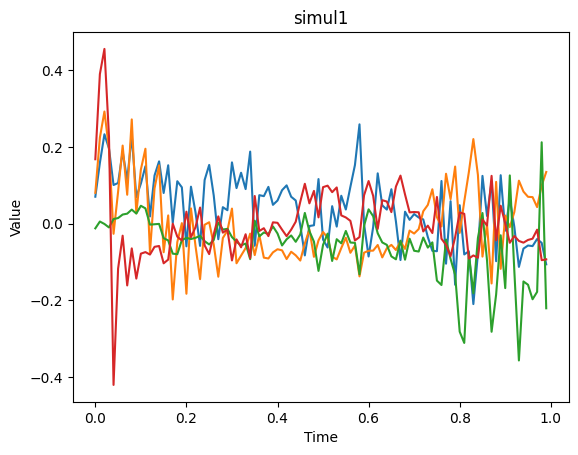

In [ ]:
for i in range(4) :
  plt.plot(grid, simul1[i,])

plt.title('simul1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

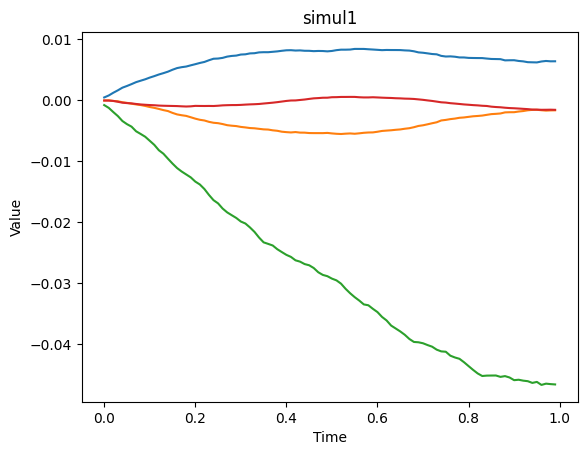

In [ ]:
for i in range(4) :
  plt.plot(grid, u[i,])

plt.title('simul1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
first = np.zeros(500)
second = np.zeros(500)
X_centered = X - np.mean(X,axis=0)
for i in range(500) :
  first[i] = inner_product(u[0,],X_centered[i,])
  second[i] = inner_product(u[1,],X_centered[i,])

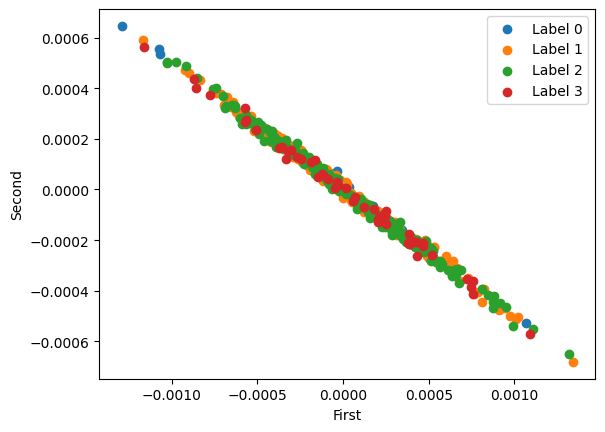

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
unique_labels = np.unique(y_sliced)

# Plot
fig, ax = plt.subplots()

for label in unique_labels:
    idx = np.where(y_sliced == label)
    ax.scatter(first[idx], second[idx], label=f'Label {label}')

ax.set_xlabel('First')
ax.set_ylabel('Second')
ax.legend()
plt.show()

### simulation 2

In [ ]:
# true beta
beta2_1 = (grid*2-1)**3+1
beta2_2 = np.cos(np.pi*(2*grid-1))+1

In [ ]:
Y2 = np.zeros(500)
np.random.seed(0)
for i in range(500) :
  Y2[i] = np.exp(inner_product(beta2_1, X[i,])) + np.exp(np.abs(inner_product(beta2_2, X[i,]))) + np.random.normal(0,0.1**0.5)

In [ ]:
simul2 = Functional_SIR(X=X, y=Y2)
u2 = simul2 @ gamma_n

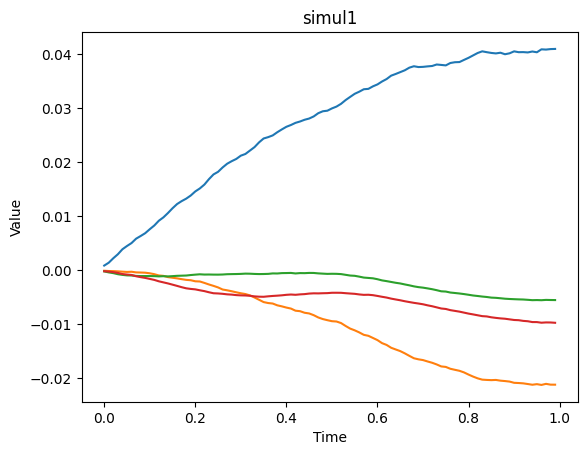

In [ ]:
for i in range(4) :
  plt.plot(grid, u2[i,])

plt.title('simul1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()